<a href="https://colab.research.google.com/github/rasulwithdata/MachineLearningProjects/blob/main/linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('font',size=14)
plt.rc('axes',labelsize=14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

In [3]:
np.random.seed(42)

m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

Rand ve randn arasindaki ferq-->rand uniform sutun tipli data yaradir,randn normal distribution tipli bir sey yaradir

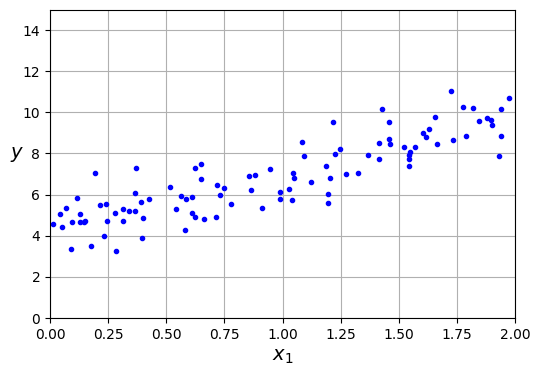

In [4]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid();

In [5]:
matrix_a = np.array([[1,2],[3,4]])
matrix_b = np.array([[5,6],[7,8]])

result = matrix_a @ matrix_b #dot-product
result1 = np.dot(matrix_a,matrix_b) #dot-product
# np.matmal() #dot-product
# matrix_a * matrix_b --> elementwise

print('Matrix A:')
print(matrix_a)
print('\nMatrix B:')
print(matrix_b)
print('\nResult of Matrix multiplication(A@B)')
print(result1)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

Result of Matrix multiplication(A@B)
[[19 22]
 [43 50]]


In [6]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)   #wx + b de b olsun deye

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # X transpose times X and then inverse it and lot product X transpose and y
#theta_best

In [7]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [8]:
theta_best       #b and w values

array([[4.21509616],
       [2.77011339]])

In [9]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [10]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

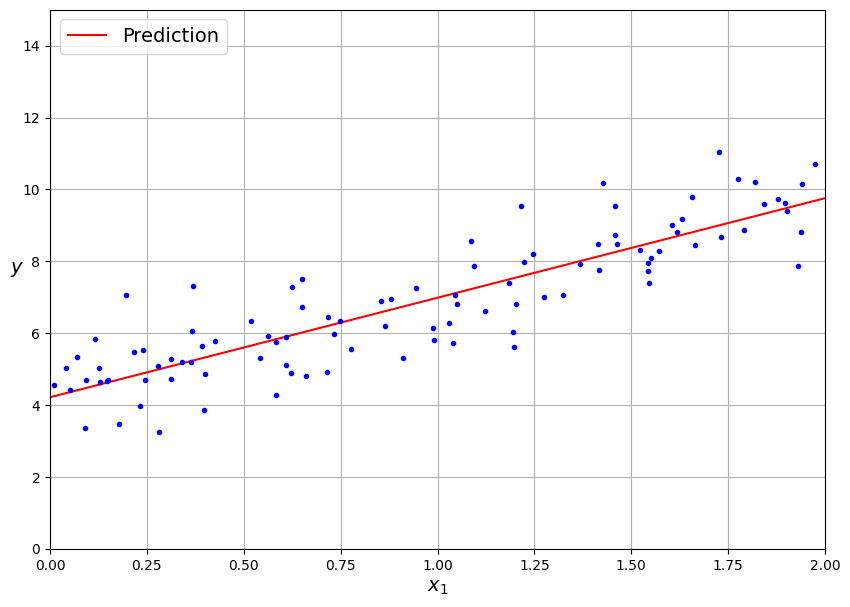

In [11]:
plt.figure(figsize=(10,7))
plt.plot(X_new,y_predict,'r-',label='Prediction')
plt.plot(X,y,'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc='upper left')

plt.show()

In [12]:
X.shape, X.T.shape

((100, 1), (1, 100))

In [13]:
def linreg(X, y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

print(linreg(X_b, y))

[[4.21509616]
 [2.77011339]]


In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_             # intercept b-di, coefficent ise w-di

(array([4.21509616]), array([[2.77011339]]))

**Stochastic Gradient Descend**

In [15]:
np.random.seed(42)
eta = 0.1
m = len(X_b)
n_epochs = 1000
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index+1]     # : den sonras; olanda matrix edir ona gore yaziriq
    yi = y[random_index : random_index+1]
    gradients = 2 * xi.T @ (xi @ theta -yi)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.17686315],
       [2.85986577]])

eynisi asagida

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0 = 0.01, n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())        #ravel reduces dimension to 1D

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

Mini batch gradient descend

In [18]:
np.random.permutation(m)

array([96, 70, 28, 72, 87, 91,  6, 42, 40, 94, 37, 67, 52, 33, 34, 57, 63,
       64, 82, 11, 12,  2, 25, 93,  5, 35, 48, 54, 62, 19, 53, 43, 80, 61,
       45, 75, 46,  8, 66, 92, 18, 20, 77,  0,  7, 10, 27, 50, 58, 23, 74,
       30, 76, 15,  9, 24, 79, 26, 95, 85, 32, 41, 71, 88, 16,  3, 55, 90,
       89, 81,  4, 60, 56, 65, 31, 68, 73, 83, 86, 14, 49, 17, 13,  1, 51,
       21, 36, 44, 84, 47, 99, 38, 29, 98, 22, 97, 78, 69, 59, 39])

In [19]:
from math import ceil

n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20               #1 destede 20 dene olsun
n_batches_per_epoch = ceil(m / minibatch_size)           # ceil bolende yuxariya yuvarlaqlashdiririq

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(0, n_batches_per_epoch):
    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx : idx + minibatch_size]
    yi = y_shuffled[idx : idx + minibatch_size]
    gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
    theta = theta - eta * gradients

In [20]:
theta

array([[4.22023943],
       [2.7704472 ]])

Polynomial Regression

In [21]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

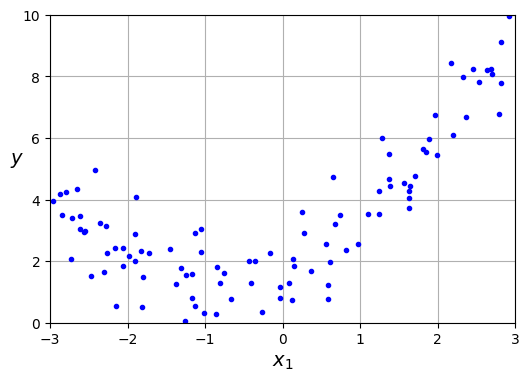

In [22]:
plt.figure(figsize =(6,4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [23]:
lin_reg.fit(X,y)

predictions = lin_reg.predict([[-3], [3]])
predictions

array([[1.03315352],
       [6.09487734]])

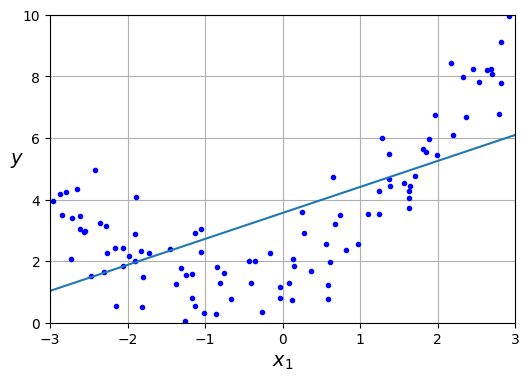

In [24]:
plt.figure(figsize = (6,4))
plt.plot(X, y, 'b.')
plt.plot([-3, 3], predictions)
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures  #ax2 + bx + c

In [26]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [27]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [28]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [29]:
model = lin_reg.fit(X_poly, y)
poly_predict = model.predict

In [30]:
X.shape

(100, 1)

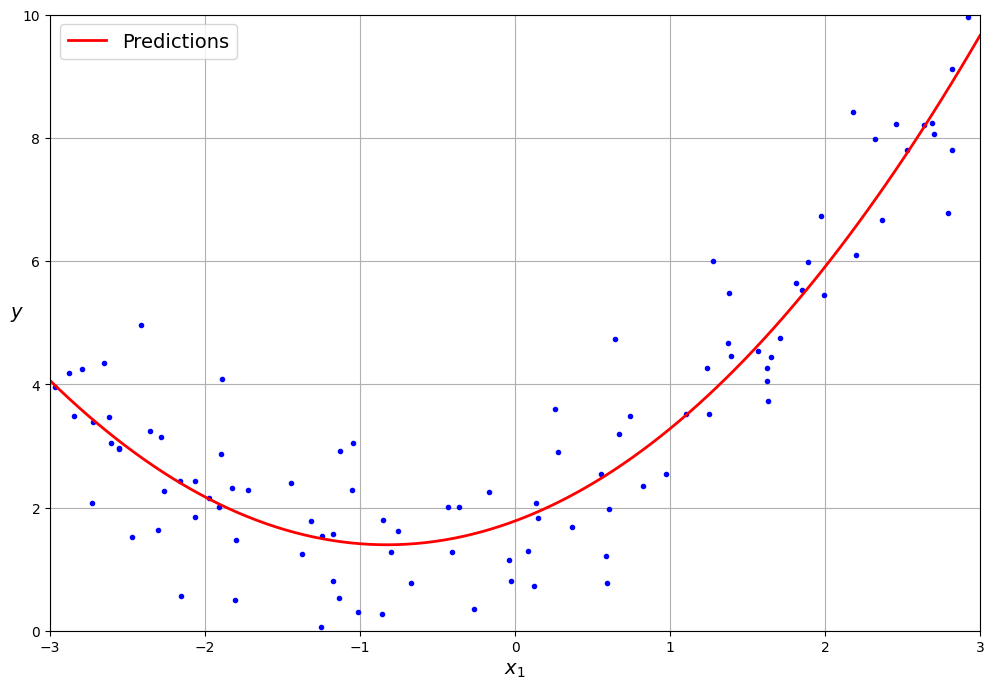

In [31]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize = (12, 8))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth = 2, label ='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.legend(loc = 'upper left')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

(np.float64(0.0), np.float64(80.0), np.float64(0.0), np.float64(5.0))

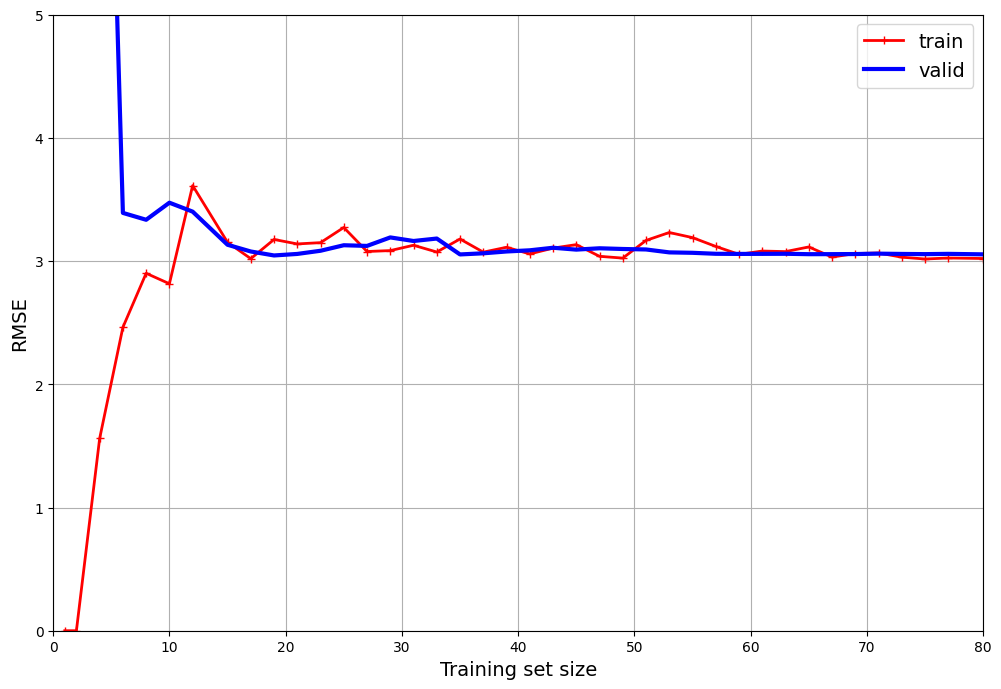

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_mean_squared_error'
)

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.figure(figsize = (12, 8))
plt.plot(train_sizes, train_errors, 'r-+', linewidth = 2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth = 3, label ='valid')

plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.axis([0, 80, 0, 5])

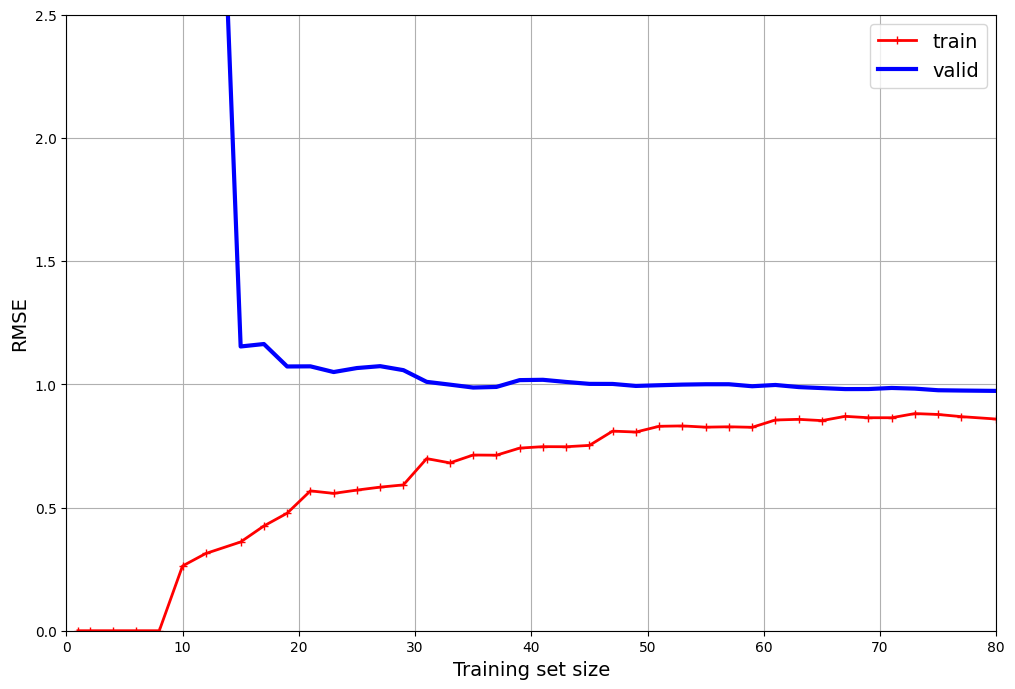

In [33]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(7, include_bias = False),
    LinearRegression()
)


train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv=5,
    scoring= 'neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.axis([0, 80, 0, 2.5])

plt.show()

**Regularized Linear Models**


**Ridge Regression or L2 regularization**

L2 ridge --> butun sutunlarda regularization edir,

L1 lasso tekce az contribution eden sutunlari 0'a vuraraq onlari kenarlashdirir

Regularization tekce train zamani ishleyir, daha yaxsi oyrenmek uchundur

regularization cost w'nin qiymetini azaldir, gradient descent cost functionu azaldir

In [34]:
np.random.seed(42)
m=20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

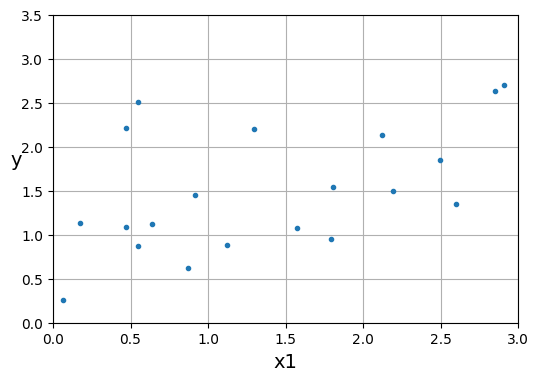

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, '.')
plt.xlabel('x1')
plt.ylabel('y', rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [36]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.1, solver='cholesky')     # alpha is lambda       cholesky olanda normal equation ile hesablayir gradient descendle yox
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55325833])

******Normal Equation******

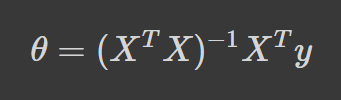

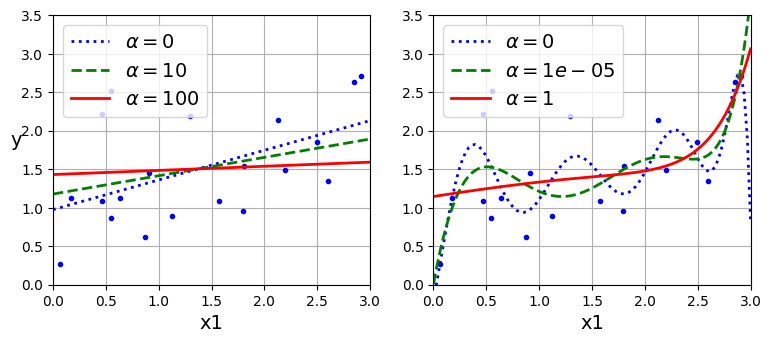

In [38]:
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kwargs):
  plt.plot(X, y , 'b.', linewidth = 3)
  for alpha, style, in zip(alphas, ('b:', 'g--', 'r-')):
    if alpha > 0 :
      model = model_class(alpha, **model_kwargs)
    else:
      model = LinearRegression()
    if polynomial:
      model = make_pipeline(
          PolynomialFeatures(degree = 10, include_bias= False),
          StandardScaler(),
          model
      )
    model.fit(X, y)
    y_new_regul = model.predict(X_new)
    plt.plot(X_new, y_new_regul, style, linewidth = 2,
             label=fr'$\alpha = {alpha}$')
  plt.legend(loc='upper left')
  plt.xlabel('x1')
  plt.axis([0, 3, 0, 3.5])
  plt.grid()


plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state = 42)
plt.ylabel('y', rotation= 0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [39]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty= 'l2',
                       max_iter = 1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [40]:
ridge_reg2 = Ridge(alpha=0.01, solver='sag')
ridge_reg2.fit(X, y)
ridge_reg2.predict([[1.5]])

array([1.55355008])

Normal Equation birbasha duzgun cavabi hesablayirdi SGD ise addimlarla



In [41]:
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]        # c_   --> concatanate
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [42]:
ridge_reg2.intercept_ , ridge_reg2.coef_

(array([0.97582695]), array([0.38514876]))

**Lasso Regression (L1)**

lasso chox zaman ishletmemeye chalish cunki silende bir biri ile elaqeli (duz mutenasib formada yuksek elaqesi olan) sutunlari da ata biler



In [43]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

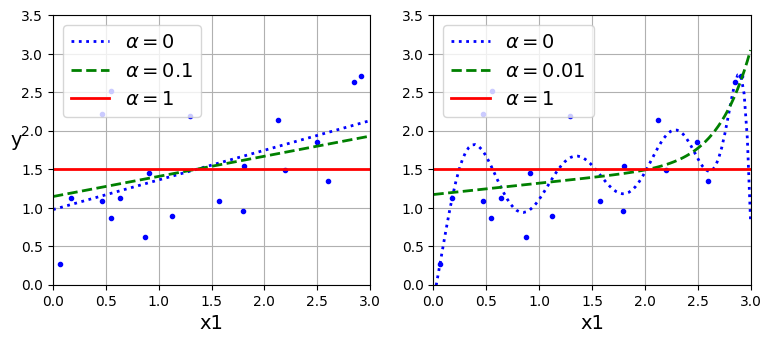

In [45]:
plt.figure(figsize= (9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial= False, alphas=(0, 0.1, 1) , random_state=42)
plt.ylabel('y', rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial= True, alphas=(0, 1e-2, 1), random_state=42)
plt.show()

lasso da alfa 1 olanda birbasha butun weightlari 0a beraber qoyur



**Elastic Net (L1 və L2 arasında)**


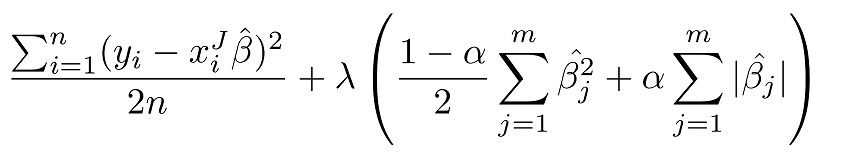

alpha 1 olsa 1-alpha = 0 onda ridge regression gedir lasso qalir. 0 olsa onda 0 vuraq morterizenin 2ci hissesi, onda lasso gedir ridge qalir



In [46]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha= 0.1, l1_ratio = 0.5)           # alpha yuxaridaki lambdanin yerine gedir, l1_ratio alphanin yerine
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

bir chox halda default olaraq ridge daha yaxshidi



**Logistic Regression**


**Estimating Probablities**


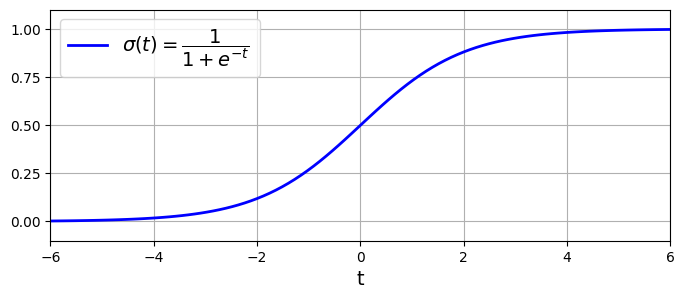

In [47]:

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1/ (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot(t, sig, 'b-', linewidth=2, label=r'$\sigma(t) = \dfrac{1}{1+e^{-t}}$ ')
plt.xlabel('t')
plt.legend(loc='upper left')
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

Decision Boundaries

In [48]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [49]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [50]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target]  == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

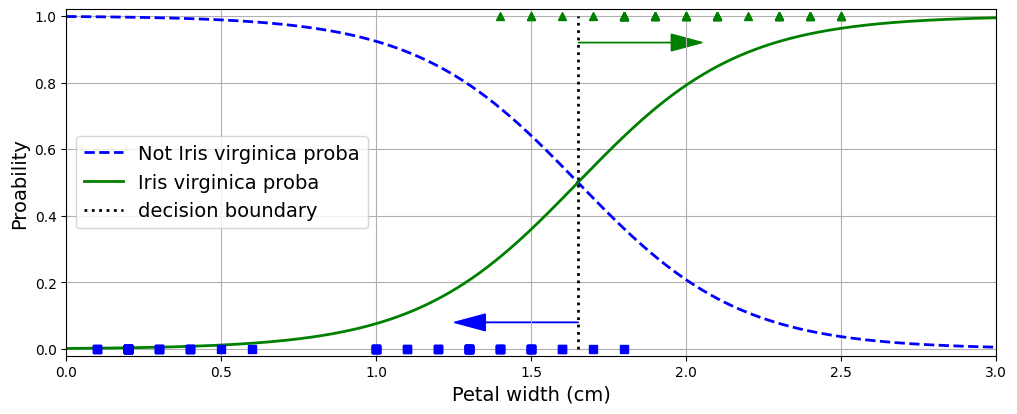

In [57]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)    # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(12, 4.5))
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2,
         label='Not Iris virginica proba')
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris virginica proba')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2,
         label='decision boundary')

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.plot(X_train[y_train == 0], y_train[y_train == 0], 'bs')
plt.plot(X_train[y_train == 1], y_train[y_train == 1], 'g^')


plt.xlabel('Petal width (cm)')
plt.ylabel('Proability')
plt.legend(loc = 'center left')
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()